In [34]:
import numpy as np
import matplotlib.pyplot as plt
import gufm1
%matplotlib inline

In [3]:
year = 1990
g,h = gufm1.get_gh_at_t(year)

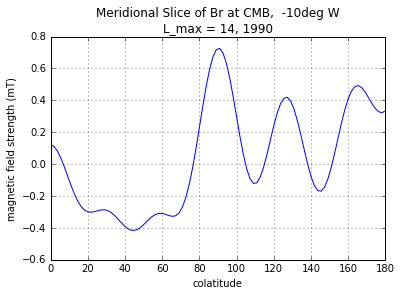

In [18]:
r = 3480.
th = np.linspace(0,np.pi,100)
ph = -10*np.pi/180.
Br1990 = gufm1.Br(r,th,ph,g,h)

plt.plot(th*180/np.pi, Br1990/1e6)
plt.grid()
plt.title('Meridional Slice of Br at CMB,  -10deg W\nL_max = 14, 1990')
plt.xlabel('colatitude')
plt.ylabel('magnetic field strength (mT)')

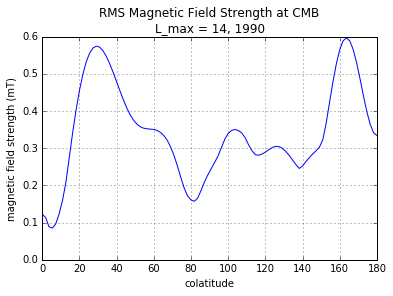

In [15]:
ph = np.linspace(0,2*np.pi,180)
Br_rms = []
for t in th:
    Br_rms.append(np.average(np.abs(gufm1.Br(r,t,ph,g,h))))

plt.plot(th*180/np.pi, np.array(Br_rms)/1e6)
plt.grid()
plt.title('RMS Magnetic Field Strength at CMB\nL_max = 14, 1990')
plt.xlabel('colatitude')
plt.ylabel('magnetic field strength (mT)')

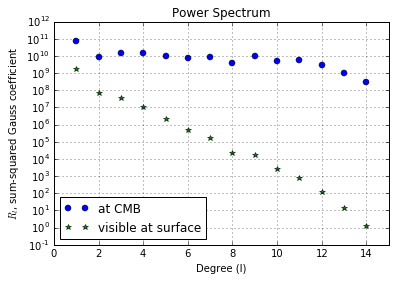

In [41]:
R_core = 3480.
R_earth = 6371.2
Rl_core = gufm1.Rl_list(g,h,r=R_core)
Rl_earth = gufm1.Rl_list(g,h,r=R_earth)

plt.semilogy(range(1,15),Rl_core, 'o')
plt.semilogy(range(1,15),Rl_earth, '*')
plt.title('Power Spectrum')
plt.xlabel('Degree (l)')
plt.ylabel(r'$R_l$, sum-squared Gauss coefficient')
plt.legend(['at CMB', 'visible at surface'], loc='best')
plt.xlim([0,15])
plt.ylim([.1,10**12])
plt.grid()

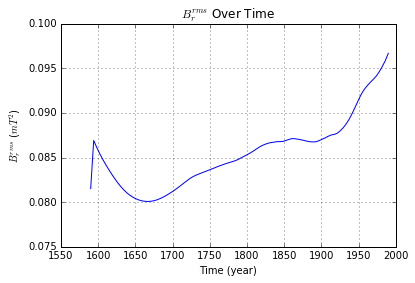

In [44]:
R_core = 3480.
R_earth = 6371.2
times = np.linspace(1590, 1990,100)
Br_t = []
for t in times:
    g,h = gufm1.get_gh_at_t(t)
    Br_t.append(gufm1.Br_rms_sq(gufm1.Rl_list(g,h,r=R_core))/1e12)

plt.plot(times,Br_t)
plt.title(r'$B_r^{rms}$ Over Time')
plt.xlabel('Time (year)')
plt.ylabel(r'$B_r^{rms}$ ($mT^2$)')
plt.ylim([0.075, 0.1])
plt.grid()